##**Importing Necessary Libraries**

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from  matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [3]:
Letter_Data = pd.read_csv('letterdata.csv')
Letter_Data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


##**Initial Analysis**

In [4]:
Letter_Data.shape

(20000, 17)

In [5]:
Letter_Data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [6]:
Letter_Data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
Letter_Data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [8]:
Letter_Data['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

## **Model Building**

In [9]:
x = Letter_Data.drop(labels='letter', axis=1)
y = Letter_Data[['letter']]

In [ ]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [10]:
y

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [11]:
scale = StandardScaler()
scaled_x = scale.fit_transform(x)
scaled_x

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.20,random_state = 12)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16000, 16), (16000, 1), (4000, 16), (4000, 1))

In [14]:
Letter_Data.corr()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


In [15]:
pca = PCA(n_components=2,random_state=12)
pca_value = pca.fit_transform(scaled_x)
pca_data = pd.DataFrame(pca_value)
pca_data.columns = ['x1','x2']
pca_data

,x1,x2
0,-2.080335,-1.721467
1,0.369369,2.014121
2,1.654349,1.754980
3,1.490279,-0.508882
4,-3.080979,2.069847
...,...,...
19995,-2.380036,0.131238
19996,1.957905,-1.326364
19997,1.285034,-3.849971
19998,-2.345298,0.183458


In [19]:
final_df=pd.concat([Letter_Data['letter'],pd.DataFrame(pca_value,columns=['x1','x2'])],axis=1)
final_df

,letter,x1,x2
0,T,-2.080335,-1.721467
1,I,0.369369,2.014121
2,D,1.654349,1.754980
3,N,1.490279,-0.508882
4,G,-3.080979,2.069847
...,...,...,...
19995,D,-2.380036,0.131238
19996,C,1.957905,-1.326364
19997,T,1.285034,-3.849971
19998,S,-2.345298,0.183458


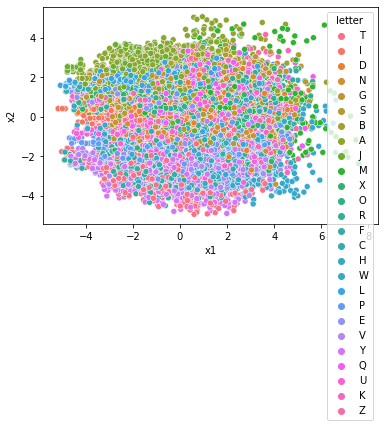

In [23]:
sns.scatterplot(data=final_df, x='x1', y='x2', hue='letter');

## **Model Training**

In [35]:
Kernals = ['rbf','linear','poly']
for i in Kernals:
   
   SVM_Classifier = SVC( C=1, kernel= i, degree=3, gamma=0.1,class_weight=None,random_state=12)
   SVM_Classifier.fit(x_train,y_train)
   y_train_pred =  SVM_Classifier.predict(x_train)
   y_test_pred =  SVM_Classifier.predict(x_test)
   print('Kernel Type        : ',i)
   print('For Training Data  : ')
   print('Accuracy Score     :',accuracy_score(y_train,y_train_pred))
   print('Confusion Matrix     :\n',confusion_matrix(y_train,y_train_pred))
   print('For Testing Data  : ')
   print('Accuracy Score     :',accuracy_score(y_test,y_test_pred))
   print('Confusion Matrix     :\n',confusion_matrix(y_test,y_test_pred))
   

Kernel Type        :  rbf
For Training Data  : 
Accuracy Score     : 0.9734375
Confusion Matrix     :
 [[656   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 595   0   4   1   0   0   1   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   1   0   0]
 [  0   0 561   0   2   0   7   0   0   0   0   0   0   0   8   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   3   0 627   0   0   0   6   0   0   0   0   0   2   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   3   0   0 612   0  10   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   1]
 [  0   2   0   1   2 610   1   1   1   0   0   0   0   0   0   4   0   0
    1   3   0   0   0   0   0   0]
 [  0   1   0   7   1   1 607   0   0   0   0   0   1   0   4   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   5   0  14   0   0   7 532   0   0   8   0   0   0   2   0   2  18
    0   0   2   0   0   0   0   0]
 [  0   1   0   2   0   1

##**Conclusion**
The accuracy achieved using a non-linear kernel 0.96 is mush higher than that of a linear one 0.85. We can conclude that the problem is highly non-linear in nature.